<a href="https://colab.research.google.com/github/viethung52/AI/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets               import fashion_mnist
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers  import RMSprop
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 

import matplotlib.pyplot as plt
import numpy as np

4431872/4422102 [==============================] - 0s 0us/step


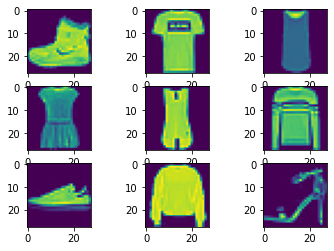

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

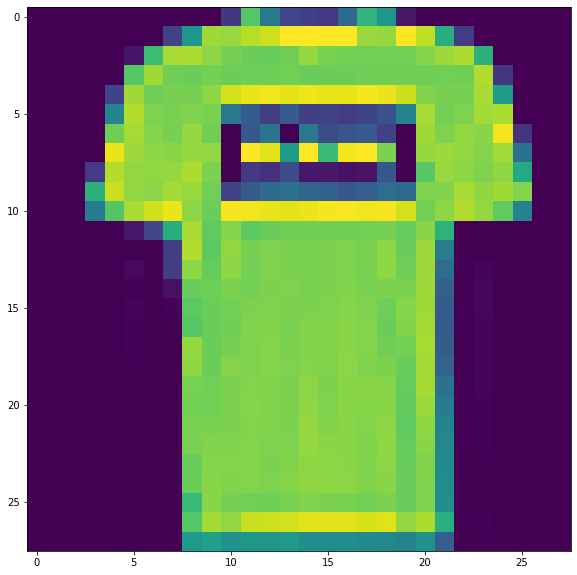

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[1])

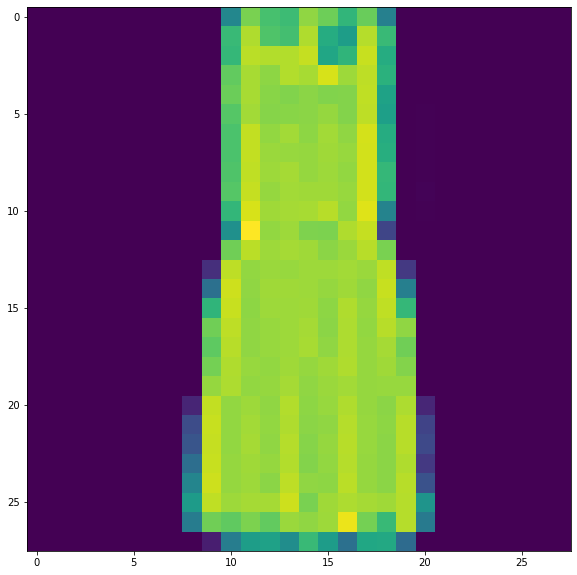

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[30000])

In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
model=Sequential()
model.add(Dense(512,kernel_initializer='normal',activation = 'relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(16,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(8,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                      

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=30,verbose=1,validation_data=(x_test, y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

Epoch 1/30
469/469 [==============================] - 15s 7ms/step - loss: 0.6801 - accuracy: 0.7451 - val_loss: 0.4831 - val_accuracy: 0.8211
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4381 - accuracy: 0.8376 - val_loss: 0.3777 - val_accuracy: 0.8663
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3709 - accuracy: 0.8638 - val_loss: 0.3239 - val_accuracy: 0.8837
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3339 - accuracy: 0.8767 - val_loss: 0.3047 - val_accuracy: 0.8899
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3144 - accuracy: 0.8845 - val_loss: 0.3422 - val_accuracy: 0.8812
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2982 - accuracy: 0.8900 - val_loss: 0.2791 - val_accuracy: 0.8987
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2851 - accuracy: 0.8951 - val_loss: 0.2824 - val_accuracy: 0.8989
Epoch

In [9]:
model.save('fashion_Mnist_model.h5')

<function matplotlib.pyplot.show>

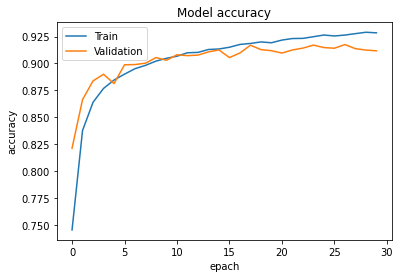

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epach')
plt.legend(['Train','Validation'],loc='upper left')
plt.show

In [11]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:',score[0])
print('Test accuracy', score[1])

Test loss: 0.2478972226381302
Test accuracy 0.9117000102996826


Giá trị dự đoán: 5


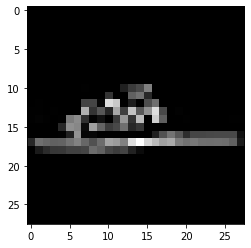

In [12]:
plt.imshow(x_test[1456].reshape(28,28), cmap='gray')
y_predict = model.predict(x_test[1456].reshape(1,28,28))
print('Giá trị dự đoán:', np.argmax(y_predict))
plt.show()

Giá trị dự đoán: 4


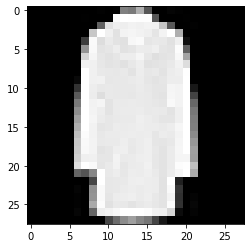

In [13]:
plt.imshow(x_test[1400].reshape(28,28), cmap='gray')
y_predict = model.predict(x_test[1400].reshape(1,28,28))
print('Giá trị dự đoán:', np.argmax(y_predict))
plt.show()

In [14]:
from google.colab import files
uploaded = files.upload()

Saving shoes.png to shoes.png


Giá trị dự đoán: 2


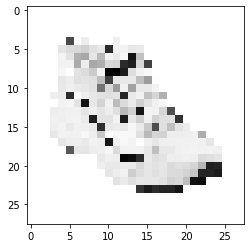

In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('shoes.png', color_mode = "grayscale", target_size=(28,28))
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img = img / 255.0

# load model
#model = load_model('fashion_Mnist_model.h5')
plt.imshow(img.reshape(28,28), cmap='gray')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()

In [23]:
from google.colab import files
uploaded = files.upload()

Saving bag.png to bag.png


Giá trị dự đoán: 9


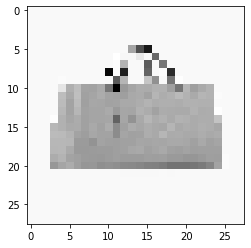

In [24]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('bag.png', color_mode = "grayscale", target_size=(28,28))
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img = img / 255.0

# load model
#model = load_model('fashion_Mnist_model.h5')
plt.imshow(img.reshape(28,28), cmap='gray')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()